In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [3]:
#export
from pathlib import Path
import glob
from IPython.core.debugger import set_trace
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from torchvision import transforms
from PIL import Image

In [4]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [5]:
#export
from torch.nn import init
def mse(output, targ): return (output.squeeze(-1) - targ).pow(2).mean()
from torch import nn

In [6]:
#export
class ImageDataset(torch.utils.data.Dataset):
    """Dataset class for creating data pipeline"""
    def __init__(self, glob_pattern, patchsize):
        self.image_paths,self.patchsize = glob.glob(glob_pattern), patchsize

    def __len__(self): return len(self.image_paths)

    def transform(self, image):
        if image.mode == 'L':
            image = image.convert('RGB')
        self.data_transforms = transforms.Compose([transforms.RandomCrop(size = self.patchsize),
                                                   transforms.RandomHorizontalFlip(),
                                                   transforms.RandomVerticalFlip(),
                                                   transforms.ToTensor()])
        return self.data_transforms(image)

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        image= self.transform(image)
        return image

In [7]:
#export
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [8]:
#export
train_glob = '/home/adityassrana/datatmp/Datasets/CLIC/*png'
valid_glob = '/home/adityassrana/datatmp/Datasets/kodak/*.png'

In [9]:
train_ds = ImageDataset(train_glob, 128)
valid_ds = ImageDataset(valid_glob, 128)

In [10]:
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_ds, batch_size=4, shuffle=True, num_workers=4)

In [11]:
#export
from torchvision.utils import make_grid
def show_img_batch(dl:DataLoader, rows:int=4):
    batch = next(iter(dl))
    imgrid = make_grid(tensor=batch,nrow=rows)
    plt.imshow(imgrid.permute(1, 2, 0))

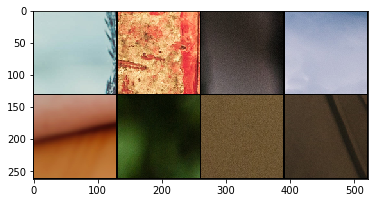

In [12]:
show_img_batch(train_dl)

In [13]:
#export
DataLoader.show_batch = lambda x: show_img_batch(x)

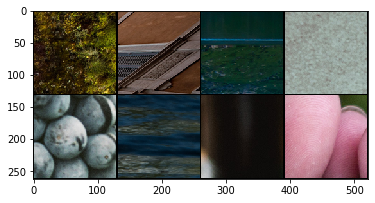

In [14]:
train_dl.show_batch()

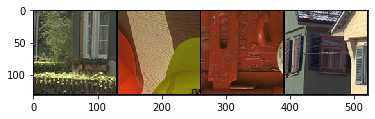

In [15]:
valid_dl.show_batch()

In [16]:
#export
def get_ds(train_glob, valid_glob, patchsize:int = 128):
    return ImageDataset(train_glob, patchsize), ImageDataset(valid_glob, patchsize)

In [17]:
#export
def get_dls(train_ds, valid_ds, bs:int=8,**kwargs):
    return  DataLoader(train_ds, batch_size=bs, shuffle=True, num_workers= 4),DataLoader(valid_ds, batch_size=bs, shuffle=False, num_workers=2)

In [18]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl):
        self.train_dl,self.valid_dl = train_dl,valid_dl
        
    @property
    def train_ds(self): return self.train_dl.dataset
        
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [19]:
!python notebook2script.py 00_imports_and_data.ipynb

Converted 00_imports_and_data.ipynb to exp/nb_00.py
